In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def average_values(df, cols, val_name):
    d = df.groupby(cols)[val_name].mean().reset_index(name='mean_auc_overlap')
    assert len(d) == len(df[cols].drop_duplicates())
    return d

def create_matrix(df, n_rows, n_cols, row_name, col_name, val_name):
    avg_df = average_values(df, [row_name, col_name], val_name)
    arr = np.zeros((n_rows, n_cols))
    row = avg_df[row_name].to_numpy()
    col = avg_df[col_name].to_numpy()
    val = avg_df['mean_auc_overlap'].to_numpy()
    arr[row, col] = val
    return arr

def get_singular_values(M):
    U, S, Vh = np.linalg.svd(M, full_matrices=True)
    return S

def plot_singular_values(write_fn, df, val_name):
    plt.clf()
    n_samples = df.sample_id.nunique()
    n_drugs = df.drug_id.nunique()
    arr = create_matrix(df, n_samples, n_drugs, 'sample_id', 'drug_id', val_name)
    S = get_singular_values(arr)
    plt.ylabel('singular value')
    plt.xlabel('ordered rank')
    title = val_name + ' singular values'
    plt.title(title)
    plt.scatter(range(len(S)), S)
    plt.savefig(write_fn, bbox_inches='tight')

In [3]:
df = pd.read_csv('~/Documents/research/tansey/msk_intern/pyro_model/data/rep-gdsc-ctd2-clean.csv')

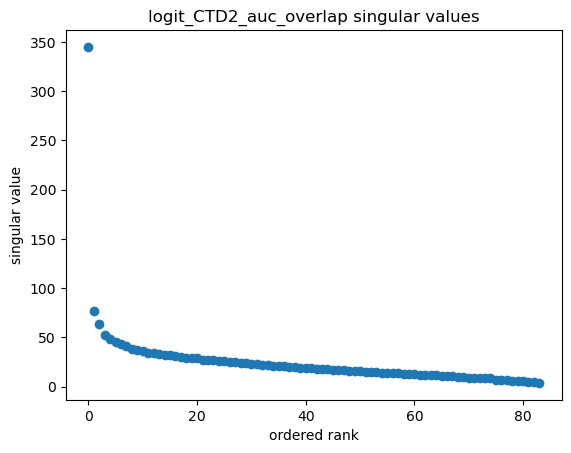

In [4]:
save_dir = '../results/2023-07-17'
# raw overlaps
plot_singular_values(save_dir + '/REP_auc_sv.png', df, 'REP_auc_overlap')
plot_singular_values(save_dir + '/GDSC_auc_sv.png', df, 'GDSC_auc_overlap')
plot_singular_values(save_dir + '/CTD2_auc_sv.png', df, 'CTD2_auc_overlap')
# log overlaps
plot_singular_values(save_dir + '/log_REP_auc_sv.png', df, 'log_REP_auc_overlap')
plot_singular_values(save_dir + '/log_GDSC_auc_sv.png', df, 'log_GDSC_auc_overlap')
plot_singular_values(save_dir + '/log_CTD2_auc_sv.png', df, 'log_CTD2_auc_overlap')
# logit overlaps
plot_singular_values(save_dir + '/logit_REP_auc_sv.png', df, 'logit_REP_auc_overlap')
plot_singular_values(save_dir + '/logit_GDSC_auc_sv.png', df, 'logit_GDSC_auc_overlap')
plot_singular_values(save_dir + '/logit_CTD2_auc_sv.png', df, 'logit_CTD2_auc_overlap')